# Convolutional Neural Network

Feedfroward Neural Network does not consider any spatial information of input images.  
Convolutional Neural Network extracts spatial features from input images and use to train the model.

## Fashion MNIST Dataset with CNN

### Load Dataset

In [2]:
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt
from tensorflow.python.framework import ops

from tensorflow.examples.tutorials.mnist import input_data

# load data
data = input_data.read_data_sets('data/fashion', one_hot=True)

Extracting data/fashion/train-images-idx3-ubyte.gz
Extracting data/fashion/train-labels-idx1-ubyte.gz
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Extracting data/fashion/t10k-labels-idx1-ubyte.gz


### Define Variables and Placeholders


In [61]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y = tf.placeholder(tf.float32, shape=[None, 10])


### CNN Model


#### Convolution Layer 1

- 28 x 28 graysacle image as the input
- 4 Kernals with 5 x 5
- Stride of (1,1,1,1)

In [62]:
x_image = tf.reshape(x, [-1, 28, 28, 1])

W_conv1 = tf.Variable(tf.truncated_normal([5, 5, 1, 4], stddev=0.1))
b_conv1 = tf.Variable(tf.constant(0.1, shape=[4]))

conv1 = tf.nn.conv2d(x_image, W_conv1, strides=[1, 1, 1, 1], padding='SAME') + b_conv1

relu_conv1 = tf.nn.relu(conv1) 


#### Convolution Layer 2

- 4 Input channels from previous layer
- 8 Kernals with 5 x 5
- Stride of (1,2,2,1)

In [63]:
W_conv2 = tf.Variable(tf.truncated_normal([5, 5, 4, 8], stddev=0.1)) 
b_conv2 = tf.Variable(tf.constant(0.1, shape=[8]))

conv2 = tf.nn.conv2d(relu_conv1, W_conv2, strides=[1, 2, 2, 1], padding='SAME') + b_conv2
relu_conv2 = tf.nn.relu(conv2) 

#### Convolution Layer 3

- 8 Input channels from previous layer
- 12 Kernals with 4 x 4
- Stride of (1,2,2,1)

In [64]:
W_conv3 = tf.Variable(tf.truncated_normal([4, 5, 8, 12], stddev=0.1)) 
b_conv3 = tf.Variable(tf.constant(0.1, shape=[12]))

conv3 = tf.nn.conv2d(relu_conv2, W_conv3, strides=[1,2,2,1], padding='SAME') + b_conv3
relu_conv3 = tf.nn.relu(conv3) 

#### Densely Connected Layer

Densely connected layer with 200 nodes.
- 12 Input channels from previous layer
- Becuase of 2 x 2 stride in two previous layers, the metric size has reduced to 7 x 7.


In [65]:
W_dc1 = tf.Variable(tf.truncated_normal([7 * 7 * 12, 200], stddev=0.1)) 
b_dc1 = tf.Variable(tf.constant(0.1, shape=[200]))

dc1 = tf.reshape(relu_conv3, [-1, 7 * 7 * 12])
relu_dc1 = tf.nn.relu(tf.matmul(dc1, W_dc1) + b_dc1)

#### Readout Layer

- 200 input channels from previous layer
- 10 lables


In [66]:
W_out = tf.Variable(tf.truncated_normal([200, 10], stddev=0.1)) 
b_out = tf.Variable(tf.constant(0.1, shape=[10]))

y_hat = tf.matmul(relu_dc1, W_out) + b_out

### Optimization Model

In [67]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=y_hat, labels=y)
cost = tf.reduce_mean(cross_entropy)

#### Gradient Descent Optimizer

In [68]:
global_step = tf.Variable(0, trainable=False)
learning_rate_start = 0.1
learning_rate = tf.train.exponential_decay(learning_rate_start, global_step,
                                             200, 0.96, staircase=True)
gradient_optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

#### Adam Optimizer

In [69]:
global_step = tf.Variable(0, trainable=False)
learning_rate_start = 0.001
learning_rate = tf.train.exponential_decay(learning_rate_start, global_step,
                                             200, 0.96, staircase=True)

adam_optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

### Evaluate Model

It checks for the index of the maximum value of the predicted image is equal to the actual labelled image. 

Then it calculates accuracy as the average prediction from all the images. 


In [70]:
prediction = tf.equal(tf.argmax(y_hat,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(prediction, "float"))

### Train and Test


In [71]:
def plotCost(itrs, costs):
    plt.figure(figsize=(16,5))
    plt.plot(np.squeeze(costs), color='#2A688B')
    plt.xlim(0, itrs-1)
    plt.ylabel("cost")
    plt.xlabel("iterations")
    plt.show()

In [75]:
def train(optimizer, debug):
    costs = []
    itrs = 1000
    init = tf.global_variables_initializer()
    
    with tf.Session() as session:
        session.run(init)
        
        for i in range(itrs):
            batch_xs, batch_ys = data.train.next_batch(100)
            
            _, batch_cost = session.run([optimizer, cost], feed_dict={x: batch_xs, y: batch_ys})
            costs.append(batch_cost)
            
            if debug:
                print("Cost after batch {batch}: {cost}".format(batch=i, cost=batch_cost))
        

        plotCost(itrs, costs)
        
        print("Train Accuracy:", session.run(accuracy, feed_dict={x: data.train.images, y: data.train.labels}))
        print("Test Accuracy:", session.run(accuracy, feed_dict={x: data.test.images, y: data.test.labels}))


#### Result with Gradient Descent

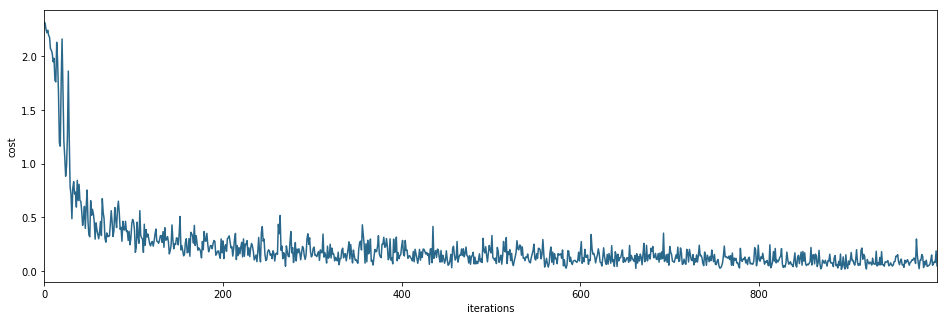

('Train Accuracy:', 0.97556365)
('Test Accuracy:', 0.9737)


In [76]:

train(gradient_optimizer, False)

#### Result with Adam Optimizer

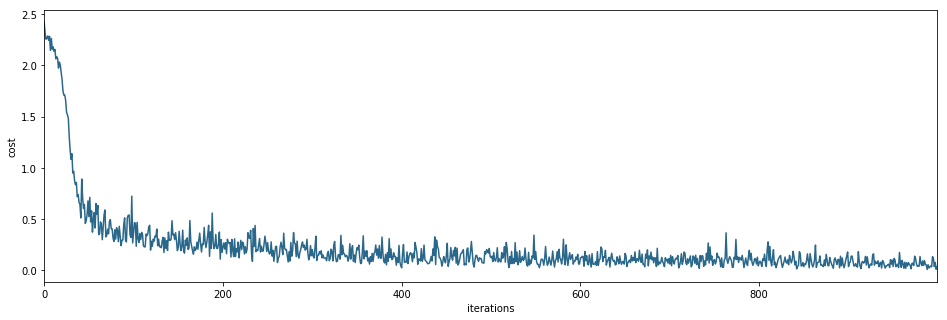

('Train Accuracy:', 0.97981817)
('Test Accuracy:', 0.9783)


In [77]:
train(adam_optimizer, False)